# Trip Forecaster 

1. Download the data, load it into your favorite statistical programing software or database.
Report the number of rows and columns that you've loaded.
2. Visualize trip distance by time of day in any way you see fit, any observations?
3. What are the most popular pickup locations on weekdays vs weekend?
4. Build a model to forecast the number of trips by hour for the next 12 hours after after Feb
12th 10:00 am. How well did you do?


# Answer
1. No of rows = 1,510,722 ; No of Columns = 21
2. Visualisation (Contd after text answers)
3. Most Popular Pickup Location

     Weekdays 
               Location ID : 75
               Manhattan, East Harlem South, Boro Zone
               No. of pickups : 56729

     Weekend 
               Location ID : 255
               Bronx, Williamsbridge/Olinville, Boro Zone
               No. of pickups : 29368
               
4.  Model Forecast : Model performs perfectly well. See the  following line

In [48]:
get_eval_n_feb12res(nn_model)

MSE on test data (x_test,y_test) =  253.64732828777457

Actual vs Predicted Number of Trip for April 12th from 1000 AM to 1000 PM 


,Actual no. of trips,Predicted no. of trips,diff of actual vs pred
0,2311,2318.074040,-7.074040
1,2175,2172.493378,2.506622
2,2024,2034.070346,-10.070346
3,2106,2121.698199,-15.698199
4,2716,2728.871261,-12.871261
5,3009,3016.344247,-7.344247
6,3517,3532.729884,-15.729884
7,4040,4076.794780,-36.794780
8,4564,4597.306700,-33.306700
9,4725,4758.853024,-33.853024


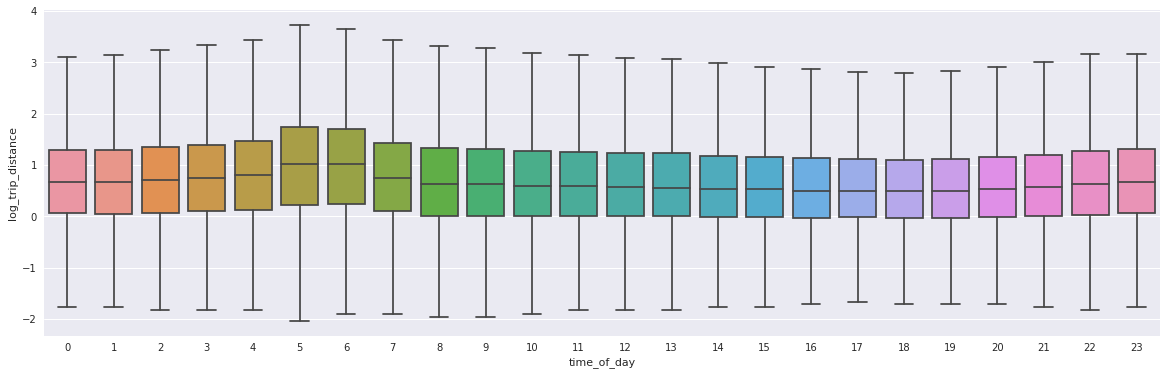

In [49]:
import seaborn as sbn
sbn.set(rc = {'figure.figsize' : (20,6)})
_ = sbn.boxplot(x="time_of_day", y= "log_trip_distance", data = gtaxi,showfliers = False  )
plt.show()

## 1.0 Data Load


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load File data
gtaxi = pd.read_csv("green_tripdata_2016-02.csv")
print("Data Sucessfully Loaded")

# column name fixes
gtaxi.columns = gtaxi.columns.str.lower().str.strip()

Data Sucessfully Loaded


###  Task 1: Report Number of Rows and Columns

In [3]:
print("No of Rows : ", gtaxi.shape[0] )
print("No. of Columns", gtaxi.shape[1] ) 

No of Rows :  1510722
No. of Columns 21


## 2.0  Exploratory Analysis


In [4]:
gtaxi.describe().round()

,vendorid,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,1510722.0,0.0,1510722.0,1510722.0,1510722.0,1510720.0
mean,2.0,1.0,-74.0,41.0,-74.0,41.0,1.0,3.0,12.0,0.0,0.0,1.0,0.0,NaN,0.0,14.0,2.0,1.0
std,0.0,1.0,3.0,2.0,3.0,2.0,1.0,3.0,9.0,0.0,0.0,2.0,1.0,NaN,0.0,11.0,1.0,0.0
min,1.0,1.0,-115.0,0.0,-115.0,0.0,0.0,0.0,-400.0,-4.0,-0.0,-10.0,-12.0,NaN,-0.0,-400.0,1.0,1.0
25%,2.0,1.0,-74.0,41.0,-74.0,41.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,NaN,0.0,8.0,1.0,1.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,NaN,0.0,11.0,1.0,1.0
75%,2.0,1.0,-74.0,41.0,-74.0,41.0,1.0,3.0,14.0,0.0,0.0,2.0,0.0,NaN,0.0,17.0,2.0,1.0
max,2.0,99.0,0.0,42.0,0.0,42.0,9.0,236.0,934.0,4.0,3.0,400.0,902.0,NaN,2.0,1121.0,5.0,2.0


## 3.0 Data PreProcessing

### 3.1 Missing Values 

In [5]:
gtaxi.isnull().sum()

vendorid                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
ratecodeid                     0
pickup_longitude               0
pickup_latitude                0
dropoff_longitude              0
dropoff_latitude               0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1510722
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      2
dtype: int64

In [6]:
# Removing column ehail_fee
gtaxi = gtaxi.dropna( axis = 1, how = 'all')

# Removing row containing 2 missing values for trip_type
gtaxi = gtaxi.dropna( axis = 0, how = 'any',  subset = ['trip_type'])

#verification
gtaxi.isnull().sum()

vendorid                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
ratecodeid               0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

### 3.2 Outlier Analysis

In [7]:
def tukey_outlier(df, col):   
    # Using Tukey's method for outlier detection.Counting no of trip distance outlier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    df['outlier'] = False    
    df['outlier'][df[col]  < Q1-1.5*IQR ] = True
    df['outlier'][df[col]  > Q1+1.5*IQR ] = True
    return df
    #return   ( df[col][df[col]  < Q1-1.5*IQR ] ).count() + (df[col][df[col]  > Q1+1.5*IQR ] ).count() 

trip_outlier_df = tukey_outlier(gtaxi, 'trip_distance')
trip_outlier_count =  gtaxi['trip_distance'][gtaxi['outlier'] == True ].count() 
#print(trip_outlier_count)
print("Trip distance outliers percentage :", trip_outlier_count * 100 / gtaxi.shape[0] )

Trip distance outliers percentage : 15.912081656428724


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Too many to be clipped. Validating  with business domain knowledge. Hence not rejected

In [8]:
#gtaxi[gtaxi['outlier'] == True ].sample(5)
gtaxi[['trip_distance','lpep_pickup_datetime','lpep_dropoff_datetime']][gtaxi['outlier'] == True ].sample(5)

,trip_distance,lpep_pickup_datetime,lpep_dropoff_datetime
170884,5.40,2016-02-04 20:02:53,2016-02-04 20:26:30
334069,7.60,2016-02-07 16:57:59,2016-02-07 17:25:25
99103,5.41,2016-02-03 11:22:53,2016-02-03 11:53:39
956954,4.70,2016-02-19 19:05:54,2016-02-19 19:28:31
981243,13.18,2016-02-20 02:57:11,2016-02-20 03:30:05


### 3.3 Feature Scaling

Prior to plotting trip distance

In [9]:
gtaxi['log_trip_distance'] =   np.log(gtaxi['trip_distance'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


### 3.4 Feature Extraction / Transformation

### 3.4.1 Time of Day

In [10]:
from datetime import datetime
gtaxi['time_of_day'] =  gtaxi['lpep_pickup_datetime'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour )

### 3.4.2 Day of Week

In [11]:
gtaxi['week_of_day'] =  gtaxi['lpep_pickup_datetime'].apply( lambda x :  datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday() )
gtaxi[['lpep_pickup_datetime','week_of_day']].sample(3)

,lpep_pickup_datetime,week_of_day
236715,2016-02-06 00:04:16,5
130819,2016-02-03 23:34:27,2
1145777,2016-02-23 09:50:30,1


## Problem Task 2 : Visualisation of Trip Distance vs Time of Day

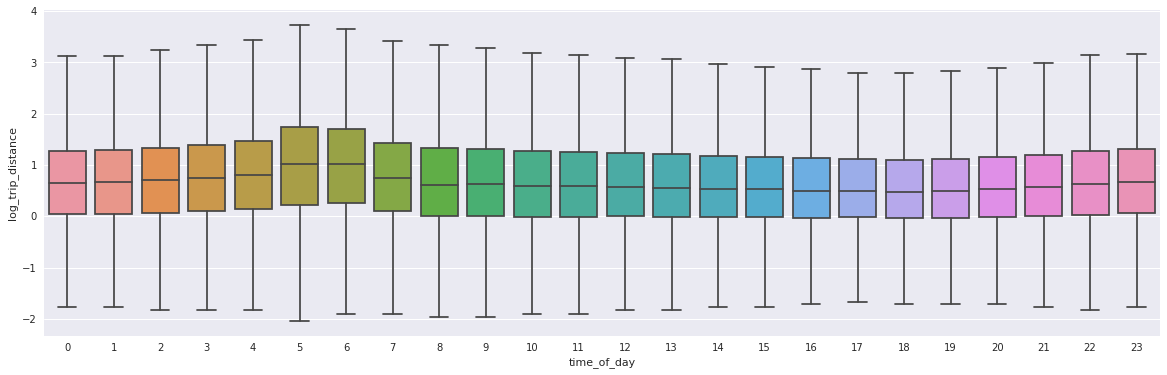

In [12]:
import seaborn as sbn
sbn.set(rc = {'figure.figsize' : (20,6)})
_ = sbn.boxplot(x="time_of_day", y= "log_trip_distance", data = gtaxi,showfliers = False  )
plt.show()

## Problem Task 3 : What are the most popular pickup locations on weekdays vs weekend?



### Task 3.1 Search Space Reduction : Reducing  Location mapping space

In [13]:
uniq_lat_long_count =  gtaxi[['pickup_longitude','pickup_latitude' ]].groupby(['pickup_longitude','pickup_latitude' ] ).ngroups
print('No of lookups with Bruteforce approach = ', gtaxi.shape[0])
no_of_computation_saved = gtaxi.shape[0]-uniq_lat_long_count
print('No of lookups with unique combination of longitude and latitude =', uniq_lat_long_count, '. Saved = ', no_of_computation_saved )


def estimate_resource_for_aproximated_location(gtaxi, round_to, prev_computation_req_count, get_df_back = 0 ):
    #1 degree = 111 km = 111 * 1000m
    # 100m = 100 / 111,000 = 0.0009 degree
    # 3 place rounding  = 0.0051 becomes 0.006 i.e 0.006-0.0051 = 0.0009 (100m) diff  considered acceptable
    # 4 place rounding  = 0.00051 becomes 0.0006 i.e 0.0006-0.00051 = 0.00009 (10m) diff  considered acceptable
    print('')    
    print('1 degree equals 111 km.Tolerating 100m -3 place rounding, 10m-4placeRounding.  Current round = ',round_to)
    gtaxi['pickup_longitude_round'] = gtaxi['pickup_longitude'].round(round_to)
    gtaxi['pickup_latitude_round']  = gtaxi['pickup_latitude'].round(round_to)
    uniq_lat_long_count_post_margin =  gtaxi[['pickup_longitude_round','pickup_latitude_round' ]].groupby(['pickup_longitude_round','pickup_latitude_round' ] ).ngroups    
    print('No of lookups with unique combination of longitude and latitude =', uniq_lat_long_count_post_margin, '. Saved = ', prev_computation_req_count - uniq_lat_long_count_post_margin)
    if get_df_back:
        return(gtaxi)

estimate_resource_for_aproximated_location(gtaxi, 4, uniq_lat_long_count)
estimate_resource_for_aproximated_location(gtaxi, 3, uniq_lat_long_count)
gtaxi =  estimate_resource_for_aproximated_location(gtaxi, 4, uniq_lat_long_count, get_df_back = 1)

No of lookups with Bruteforce approach =  1510720
No of lookups with unique combination of longitude and latitude = 1321142 . Saved =  189578

1 degree equals 111 km.Tolerating 100m -3 place rounding, 10m-4placeRounding.  Current round =  4
No of lookups with unique combination of longitude and latitude = 245754 . Saved =  1075388

1 degree equals 111 km.Tolerating 100m -3 place rounding, 10m-4placeRounding.  Current round =  3
No of lookups with unique combination of longitude and latitude = 25344 . Saved =  1295798

1 degree equals 111 km.Tolerating 100m -3 place rounding, 10m-4placeRounding.  Current round =  4
No of lookups with unique combination of longitude and latitude = 245754 . Saved =  1075388


In [14]:
import numpy as np
gtaxi_lat_lon = pd.DataFrame( np.unique(gtaxi[['pickup_longitude_round','pickup_latitude_round']], axis = 0),\
                             columns=['pickup_longitude_round','pickup_latitude_round'])
gtaxi_lat_lon.shape[0]

245754

### Task 3.2 Mapping the coordinates to Location (GeoShape File)

In [15]:
import geopandas as gpd
from shapely.geometry import Point
import urllib
import dask.dataframe as dd
import dask.distributed
import numpy as np
import sklearn.preprocessing

def append_location_id_by_coordinates(shape_file, df, lon_colname, lat_colname):
    client = dask.distributed.Client()
    coord_system = {'init': 'epsg:4326'}
    geo_lookup_point_to_loc = gpd.read_file(shape_file).to_crs(coord_system)
    
    #Reduce space
    geo_lookup_point_to_loc = geo_lookup_point_to_loc.drop(['zone','Shape_Area', 'Shape_Leng', 'OBJECTID'], axis=1)
    
    #Add Point(lat, lon) to each row of data frame. To do lookup of point next
    df_with_geom_point = gpd.GeoDataFrame(df, crs= coord_system , \
                    geometry=[ Point(xy) for xy in zip(df[lon_colname], df[lat_colname]) ])
    
    #Do lookup of point with gpd(geo database)
    df_with_geom_point = gpd.sjoin(df_with_geom_point, geo_lookup_point_to_loc,\
                                   how='left', op='within')
    return df_with_geom_point



In [16]:
import time
t0 = time.time()
coord_to_loc_df = append_location_id_by_coordinates('taxi_zones/taxi_zones.shp',gtaxi_lat_lon,\
        'pickup_longitude_round',  'pickup_latitude_round'  )
print(time.time()- t0)
coord_to_loc_df.to_csv('geo_coord_2_location2.csv')

print(coord_to_loc_df['LocationID'].describe())
print("Total count = ", coord_to_loc_df.shape[0] )
print("No. of Missing vlaues / Inappropriate coordinates i.e (-115,34) = ", coord_to_loc_df.shape[0] - 244628 )

14.144314289093018
count    244628.000000
mean        122.953652
std          77.133996
min           1.000000
25%          61.000000
50%         112.000000
75%         188.000000
max         263.000000
Name: LocationID, dtype: float64
Total count =  245754
No. of Missing vlaues / Inappropriate coordinates i.e (-115,34) =  1126


In [17]:
# join gtaxi with coord_to_loc_df
gtaxi = gtaxi.merge(coord_to_loc_df, how = 'left', on =  ['pickup_longitude_round', 'pickup_latitude_round'])
gtaxi['weekend'] = False
gtaxi['weekend'][gtaxi['week_of_day'] >= 5 ] = True

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
def get_most_popular_pickup_location(gtaxi, is_weekend = True ):
    p_summary  = gtaxi[gtaxi['weekend'] == is_weekend ].groupby(['weekend','LocationID']).count()
    return p_summary[p_summary['geometry'] == p_summary['geometry'].max()]

In [19]:
get_most_popular_pickup_location(gtaxi, is_weekend = True )

,,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,trip_type,outlier,log_trip_distance,time_of_day,week_of_day,pickup_longitude_round,pickup_latitude_round,geometry,index_right,borough
weekend,LocationID,,,,,,,,,,,,,,,,,,,,,
True,255.0,29368,29368,29368,29368,29368,29368,29368,29368,29368,29368,...,29368,29368,29368,29368,29368,29368,29368,29368,29368,29368


In [20]:
get_most_popular_pickup_location(gtaxi, is_weekend = False )

,,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,trip_type,outlier,log_trip_distance,time_of_day,week_of_day,pickup_longitude_round,pickup_latitude_round,geometry,index_right,borough
weekend,LocationID,,,,,,,,,,,,,,,,,,,,,
False,75.0,56729,56729,56729,56729,56729,56729,56729,56729,56729,56729,...,56729,56729,56729,56729,56729,56729,56729,56729,56729,56729


## Task 3 Answer:

Most popular pickup location

Weekdays = Location ID : 75 (Manhattan, East Harlem South, Boro Zone ); No. of  pickups : 56729

Weekend = Location ID : 255 (Bronx,	Williamsbridge/Olinville, Boro Zone) ; No. of  pickups : 29368

## Task 4 : Forecast Modeling

Build a model to forecast the number of trips by hour for the next 12 hours after after Feb 12th 10:00 am. How well did you do?

### 4.1  Narrow Data Space

Remove unneded columns from gtaxi

In [21]:
gtaxi = gtaxi.drop('pickup_longitude', axis = 1 ).drop('pickup_latitude', axis = 1).\
            drop('geometry', axis = 1)
gtaxi['id'] = gtaxi.index
gtaxi.sample(1)    

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,...,log_trip_distance,time_of_day,week_of_day,pickup_longitude_round,pickup_latitude_round,index_right,LocationID,borough,weekend,id
891185,2,2016-02-18 16:34:27,2016-02-18 16:57:59,N,1,-73.938904,40.821507,1,2.84,16.5,...,1.043804,16,3,-73.9426,40.7908,74.0,75.0,Manhattan,False,891185


### 4.2  Data PreProcessing - Feature Engineering

### 4.2.1 Categorical variables :: One hot Encoding

In [22]:
gtaxi = pd.get_dummies(gtaxi, columns = ['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'payment_type', 'borough'])

In [25]:
# Separate Feb 12 data from 1000 PM to 1000 AM as final test data
gtaxi_Feb12_10_to_20 = gtaxi[ (gtaxi['time_of_day'] < 20) & (gtaxi['time_of_day'] >= 10)
                    & ( gtaxi['lpep_pickup_datetime'].apply( lambda x : \
                                    datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day ) == 12 ) ] 
# do not include  it in training data
gtaxi = gtaxi[ ( gtaxi['lpep_pickup_datetime'].apply( lambda x : \
                  datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day ) != 12 ) |
            ( (gtaxi['time_of_day'] >= 20) & (gtaxi['time_of_day'] < 10)
            & ( gtaxi['lpep_pickup_datetime'].apply( lambda x : \
                  datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day ) != 12 )) ] 


### 4.2.2 Numerical variables :: Aggregation

On per hour per day of Week basis

In [26]:
aggr_per_hr_per_dayOfWk = {
    'id'                 : {  'num_trips' : 'count'   },
    'trip_distance'      : { 'tot_trip_distance' : 'sum'},
    'fare_amount'        : { 'tot_fare' : 'sum'  },
    'extra'              : { 'tot_extra' : 'sum'  },
    'mta_tax'            : { 'tot_mta_tax' : 'sum'  },
    'improvement_surcharge' : { 'tot_improv_surcharge' : 'sum'  },
    'tip_amount'         : { 'tot_tip' : 'sum'  },
    'tolls_amount'       : { 'tot_tolls' : 'sum'  },
    'passenger_count'    : { 'tot_passenger_count' : 'sum' },
    #'total'              : { 'tot_extra' : 'sum'  }, # total amount excluded, because redundant. It is comvered with other amounts
## Categorical variables aggregation    
    'vendorid_1'         : { 'tot_no_vendorid_1' : 'sum'  },
    'vendorid_2'         : { 'tot_no_vendorid_2' : 'sum'  },
    
    'ratecodeid_1'       : { 'tot_no_ratecodeid_1' : 'sum'  },
    'ratecodeid_2'       : { 'tot_no_ratecodeid_2' : 'sum'  },
    'ratecodeid_3'       : { 'tot_no_ratecodeid_3' : 'sum'  },
    'ratecodeid_4'       : { 'tot_no_ratecodeid_4' : 'sum'  },
    'ratecodeid_5'       : { 'tot_no_ratecodeid_5' : 'sum'  },
    'ratecodeid_6'       : { 'tot_no_ratecodeid_6' : 'sum'  },
    'ratecodeid_99'      : { 'tot_no_ratecodeid_99' : 'sum'  },
    
    'store_and_fwd_flag_N'      : { 'tot_no_store_and_fwd_flag_N' : 'sum'  },
    'store_and_fwd_flag_Y'      : { 'tot_no_store_and_fwd_flag_Y' : 'sum'  },
    
    'payment_type_1'     : { 'tot_no_payment_type_1' : 'sum'  },
    'payment_type_2'     : { 'tot_no_payment_type_2' : 'sum'  },
    'payment_type_3'     : { 'tot_no_payment_type_3' : 'sum'  },
    'payment_type_4'     : { 'tot_no_payment_type_4' : 'sum'  },
    'payment_type_5'     : { 'tot_no_payment_type_5' : 'sum'  },
    
## Location variables aggregation   
    'borough_Bronx'      : { 'tot_no_borough_Bronx' : 'sum'  },
    'borough_Brooklyn'   : { 'tot_no_borough_Brooklyn' : 'sum'  },
    'borough_EWR'        : { 'tot_no_borough_EWR' : 'sum'  },
    'borough_Manhattan'  : { 'tot_no_borough_Manhattan' : 'sum'  },
    'borough_Queens'     : { 'tot_no_borough_Queens' : 'sum'  },
    'borough_Staten Island'  : { 'tot_no_borough_Staten' : 'sum'  },
    
    'time_of_day' : {'time_of_day': 'min'},
    'week_of_day' : {'week_of_day': 'min'}
}

grouped = gtaxi.groupby(['time_of_day', 'week_of_day']).agg(aggr_per_hr_per_dayOfWk)
grouped_Feb12_10_to_20 = gtaxi_Feb12_10_to_20.groupby(['time_of_day', 'week_of_day']).agg(aggr_per_hr_per_dayOfWk)
grouped.sample(5)


/usr/local/lib/python3.5/dist-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,,tip_amount,vendorid_2,payment_type_3,week_of_day,vendorid_1,store_and_fwd_flag_Y,borough_Bronx,ratecodeid_2,ratecodeid_1,improvement_surcharge,...,tolls_amount,mta_tax,payment_type_5,ratecodeid_5,ratecodeid_99,borough_Queens,id,ratecodeid_3,trip_distance,borough_EWR
,,tot_tip,tot_no_vendorid_2,tot_no_payment_type_3,week_of_day,tot_no_vendorid_1,tot_no_store_and_fwd_flag_Y,tot_no_borough_Bronx,tot_no_ratecodeid_2,tot_no_ratecodeid_1,tot_improv_surcharge,...,tot_tolls,tot_mta_tax,tot_no_payment_type_5,tot_no_ratecodeid_5,tot_no_ratecodeid_99,tot_no_borough_Queens,num_trips,tot_no_ratecodeid_3,tot_trip_distance,tot_no_borough_EWR
time_of_day,week_of_day,,,,,,,,,,,,,,,,,,,,,
18,0,16166.35,11506.0,60,0,3083.0,61,843.0,23,14295.0,4284.74,...,885.17,7143.0,0,253.0,0,4013.0,14589,11,33895.89,0
11,2,9398.74,6403.0,44,2,1816.0,41,561.0,18,7944.0,2380.50,...,956.92,3966.5,1,248.0,0,1893.0,8219,4,21622.14,0
5,1,2826.40,1084.0,5,1,341.0,7,84.0,17,1302.0,398.70,...,577.40,660.0,0,96.0,0,472.0,1425,9,6654.42,1
1,3,3943.04,2933.0,26,3,742.0,14,141.0,1,3583.0,1068.64,...,104.43,1783.5,0,90.0,0,1271.0,3675,0,9804.77,0
6,2,5042.46,2155.0,16,2,750.0,9,187.0,21,2722.0,824.10,...,911.91,1373.0,0,157.0,0,682.0,2905,2,11433.43,0


In [28]:
#grouped = grouped[ (grouped['time_of_day'] >= 20) & (grouped['time_of_day'] < 10)
#                    & ( grouped['lpep_pickup_datetime'].apply( lambda x : \
#                                    datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day ) != 12 ) ] 

print( 'Training set = ', grouped.shape[0] , grouped.shape[1]  )
print( 'Final Test set for Feb 12 = ' , grouped_Feb12_10_to_20.shape[0] , grouped_Feb12_10_to_20.shape[1]  )

Training set =  168 33
Final Test set for Feb 12 =  10 33


In [29]:
grouped.describe()

,tip_amount,vendorid_2,payment_type_3,week_of_day,vendorid_1,store_and_fwd_flag_Y,borough_Bronx,ratecodeid_2,ratecodeid_1,improvement_surcharge,...,tolls_amount,mta_tax,payment_type_5,ratecodeid_5,ratecodeid_99,borough_Queens,id,ratecodeid_3,trip_distance,borough_EWR
,tot_tip,tot_no_vendorid_2,tot_no_payment_type_3,week_of_day,tot_no_vendorid_1,tot_no_store_and_fwd_flag_Y,tot_no_borough_Bronx,tot_no_ratecodeid_2,tot_no_ratecodeid_1,tot_improv_surcharge,...,tot_tolls,tot_mta_tax,tot_no_payment_type_5,tot_no_ratecodeid_5,tot_no_ratecodeid_99,tot_no_borough_Queens,num_trips,tot_no_ratecodeid_3,tot_trip_distance,tot_no_borough_EWR
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,10570.464107,6774.666667,36.577381,3.000000,1852.458333,35.214286,446.654762,19.184524,8412.869048,2520.788929,...,873.581369,4201.229167,0.434524,184.988095,0.017857,2280.982143,8627.125000,5.559524,23595.218690,0.136905
std,5217.686411,3340.820294,17.258339,2.005979,870.234932,18.994844,227.072306,10.201350,4142.353931,1239.542811,...,441.744201,2066.943508,0.722934,68.107610,0.132828,1080.215689,4201.477532,3.826636,10563.947787,0.450224
min,955.080000,914.000000,4.000000,0.000000,254.000000,1.000000,42.000000,0.000000,1128.000000,338.990000,...,98.600000,563.000000,0.000000,34.000000,0.000000,452.000000,1168.000000,0.000000,3327.800000,0.000000
25%,6901.302500,4176.750000,23.000000,1.000000,1287.750000,20.000000,248.750000,12.000000,5307.250000,1591.485000,...,576.817500,2654.875000,0.000000,147.000000,0.000000,1352.000000,5471.000000,3.000000,16214.277500,0.000000
50%,10800.430000,7257.500000,38.000000,3.000000,1971.500000,38.000000,459.000000,18.500000,8954.000000,2677.820000,...,861.665000,4466.500000,0.000000,191.000000,0.000000,2319.500000,9133.000000,4.500000,24562.520000,0.000000
75%,14210.365000,9191.750000,50.000000,5.000000,2473.750000,49.000000,620.500000,26.000000,11423.750000,3421.007500,...,1127.555000,5698.750000,1.000000,238.250000,0.000000,3034.250000,11676.000000,9.000000,30558.085000,0.000000
max,25249.320000,14238.000000,84.000000,6.000000,3803.000000,74.000000,864.000000,48.000000,17718.000000,5304.090000,...,2095.840000,8845.500000,4.000000,359.000000,1.000000,4914.000000,18041.000000,18.000000,52944.240000,4.000000


## 4. Model Building

### 4.1 Sampling

In [30]:
feature_cols = list([1,2,3] )
feature_cols = list([ 
 'ratecodeid_4', 'ratecodeid_5',  'vendorid_2',  'fare_amount', 
 'time_of_day',  'borough_Manhattan',  'payment_type_5',  'borough_Queens', 
 'payment_type_1',  'tip_amount',  'payment_type_3',  'vendorid_1', 
 'extra',  'week_of_day',  'ratecodeid_3',  'ratecodeid_99',  'payment_type_2', 
 'improvement_surcharge',  'store_and_fwd_flag_Y',  'ratecodeid_1', 
 'ratecodeid_6',  'trip_distance',  'tolls_amount',  'store_and_fwd_flag_N', 
 'borough_Bronx',  'ratecodeid_2',  'borough_Brooklyn',  'payment_type_4', 
 'borough_EWR',  'passenger_count',  'mta_tax',  'borough_Staten Island'    
] )
target_col = 'id'

X_all = grouped[feature_cols]
y_all = grouped[target_col]
X_all.head()
X_Feb12_10_to_20 = grouped_Feb12_10_to_20[feature_cols]
y_Feb12_10_to_20 = grouped_Feb12_10_to_20[target_col]

### 4.1 Split into train & test

In [31]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,\
                            test_size = 0.3, random_state = 40 )

print('Full Data Set =', X_all.shape[0])
print('Training Set Size =', X_train.shape[0])
print('Test set size = ', X_test.shape[0])

Full Data Set = 168
Training Set Size = 117
Test set size =  51


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 4.2 Choose Evaluation metric

Choosing MSE : penalises large error differences

In [32]:
from sklearn.metrics import mean_squared_error

def eval_performance(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

print( 'Testing eval metric', eval_performance(y_test , y_test ) )

Testing eval metric 0.0


### 4.3 Create base benchmark model

#### 4.3.1 Decision Tree Regreessor

In [35]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(regression_model, X, y, eval_function, params_4_grid_search ):
    # scoring function to be used  by gridsearch to  select best params
    score_function = make_scorer( eval_function, greater_is_better= False )
    
    reg = GridSearchCV( regression_model, param_grid=params_4_grid_search ,\
                       scoring = score_function,  verbose = 0 )
    reg.fit(X,y)
    return reg.best_score_ , reg.best_params_

grid_search_params = { 'max_depth' : (4,8,16,20,24,30,40) }
tree_reg = fit_model( DecisionTreeRegressor(), X_train, y_train, eval_performance, grid_search_params )
tree_reg

(-132273.58974358975, {'max_depth': 8})

In [37]:
def get_eval_n_feb12res(reg):
    print('MSE on test data (x_test,y_test) = ', eval_performance(y_test, reg.predict(X_test)))    
    print('')
    print("Actual vs Predicted Number of Trip for April 12th from 1000 AM to 1000 PM ")
    feb12_from_10_20 = pd.DataFrame.from_records( list( zip( list(y_Feb12_10_to_20['num_trips']),\
            list(reg.predict(X_Feb12_10_to_20)) ) ), columns=['Actual no. of trips','Predicted no. of trips'] )
    feb12_from_10_20['diff of  actual vs pred'] = feb12_from_10_20['Actual no. of trips'] - feb12_from_10_20['Predicted no. of trips']
    return feb12_from_10_20
            
reg = DecisionTreeRegressor( max_depth=8 ).fit(X_train, y_train)
get_eval_n_feb12res(reg) 

MSE on test data (x_test,y_test) =  222956.29901960783

Actual vs Predicted Number of Trip for April 12th from 1000 AM to 1000 PM 


,Actual no. of trips,Predicted no. of trips,diff of actual vs pred
0,2311,2685.0,-374.0
1,2175,1947.0,228.0
2,2024,1947.0,77.0
3,2106,1947.0,159.0
4,2716,2685.0,31.0
5,3009,2979.0,30.0
6,3517,3177.0,340.0
7,4040,3177.0,863.0
8,4564,4204.0,360.0
9,4725,5011.0,-286.0


#### 4.3.2 Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 60, max_depth = 12, random_state= 40)
regr.fit(X_train, y_train)

get_eval_n_feb12res(regr)

MSE on test data (x_test,y_test) =  16274.060953159053

Actual vs Predicted Number of Trip for April 12th from 1000 AM to 1000 PM 


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,Actual no. of trips,Predicted no. of trips,diff of actual vs pred
0,2311,2419.766667,-108.766667
1,2175,2115.000000,60.000000
2,2024,2046.666667,-22.666667
3,2106,2066.650000,39.350000
4,2716,2737.333333,-21.333333
5,3009,2913.400000,95.600000
6,3517,3479.683333,37.316667
7,4040,3720.766667,319.233333
8,4564,4776.666667,-212.666667
9,4725,5129.416667,-404.416667


In [40]:
# Evaluating feature significance to be used later in more complex models
# Perform feature selection , scaling and preprocessing to  the significant ones
feat_signif = pd.DataFrame.from_records( list(zip(feature_cols, regr.feature_importances_.round(4)) ) , columns = ['features', 'significance'] ) 
#feat_signif.sort_values('significance', ascending= False)

## 4.4  Creating Complex models

### 4.4.1 Default implementation without feature preprocess
For benchmarking purpose

In [41]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(100, ), activation = 'relu',\
                  solver = 'adam', max_iter = 10000, tol = 0.001,\
                  shuffle = True     )
nn_model = nn.fit(X_train,y_train)

get_eval_n_feb12res(nn_model)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE on test data (x_test,y_test) =  14135596.662863068

Actual vs Predicted Number of Trip for April 12th from 1000 AM to 1000 PM 


,Actual no. of trips,Predicted no. of trips,diff of actual vs pred
0,2311,3578.794868,-1267.794868
1,2175,3326.402191,-1151.402191
2,2024,3107.907416,-1083.907416
3,2106,3121.716703,-1015.716703
4,2716,4057.331723,-1341.331723
5,3009,4414.308024,-1405.308024
6,3517,5223.890567,-1706.890567
7,4040,5721.291589,-1681.291589
8,4564,6276.934334,-1712.934334
9,4725,6274.356677,-1549.356677


### 4.4.2 Feature Selection 
On  relevant features as identified by Random Regressor

In [42]:
# Cutting off features below 0.001
feat_signif.sort_values('significance', ascending= False)
rel_features = list(feat_signif['features'][ feat_signif['significance'] > 0.001 ])
list(rel_features)

['vendorid_2',
 'fare_amount',
 'borough_Queens',
 'payment_type_1',
 'tip_amount',
 'vendorid_1',
 'payment_type_2',
 'improvement_surcharge',
 'store_and_fwd_flag_Y',
 'ratecodeid_1',
 'trip_distance',
 'store_and_fwd_flag_N',
 'borough_Bronx',
 'borough_Brooklyn',
 'passenger_count',
 'mta_tax']

In [43]:
# Explore relevant features for preprocessing needs
X_all = X_all[rel_features]
X_all.describe()

,vendorid_2,fare_amount,borough_Queens,payment_type_1,tip_amount,vendorid_1,payment_type_2,improvement_surcharge,store_and_fwd_flag_Y,ratecodeid_1,trip_distance,store_and_fwd_flag_N,borough_Bronx,borough_Brooklyn,passenger_count,mta_tax
,tot_no_vendorid_2,tot_fare,tot_no_borough_Queens,tot_no_payment_type_1,tot_tip,tot_no_vendorid_1,tot_no_payment_type_2,tot_improv_surcharge,tot_no_store_and_fwd_flag_Y,tot_no_ratecodeid_1,tot_trip_distance,tot_no_store_and_fwd_flag_N,tot_no_borough_Bronx,tot_no_borough_Brooklyn,tot_passenger_count,tot_mta_tax
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,6774.666667,101269.574286,2280.982143,4328.577381,10570.464107,1852.458333,4236.833333,2520.788929,35.214286,8412.869048,23595.218690,8591.910714,446.654762,3331.244048,11674.279762,4201.229167
std,3340.820294,47545.528514,1080.215689,2225.681274,5217.686411,870.234932,2037.018279,1239.542811,18.994844,4142.353931,10563.947787,4184.533494,227.072306,1914.941457,5812.323907,2066.943508
min,914.000000,12953.660000,452.000000,384.000000,955.080000,254.000000,656.000000,338.990000,1.000000,1128.000000,3327.800000,1163.000000,42.000000,346.000000,1665.000000,563.000000
25%,4176.750000,65925.582500,1352.000000,2725.500000,6901.302500,1287.750000,2719.250000,1591.485000,20.000000,5307.250000,16214.277500,5444.000000,248.750000,1892.750000,7179.500000,2654.875000
50%,7257.500000,107176.145000,2319.500000,4394.000000,10800.430000,1971.500000,4423.500000,2677.820000,38.000000,8954.000000,24562.520000,9104.000000,459.000000,3112.500000,12395.500000,4466.500000
75%,9191.750000,133204.085000,3034.250000,6001.750000,14210.365000,2473.750000,5778.000000,3421.007500,49.000000,11423.750000,30558.085000,11640.000000,620.500000,4635.750000,15769.750000,5698.750000
max,14238.000000,217673.980000,4914.000000,9701.000000,25249.320000,3803.000000,8621.000000,5304.090000,74.000000,17718.000000,52944.240000,17976.000000,864.000000,9227.000000,25201.000000,8845.500000


### 4.4.3 Feature Scaling

In [44]:
#_X_all = X_all
#_X_Feb12_10_to_20 = X_Feb12_10_to_20
#X_all = _X_all
#X_Feb12_10_to_20 = _X_Feb12_10_to_20
#X_all.sample(2)
#X_Feb12_10_to_20.sample(4)

In [45]:
from sklearn.cross_validation import train_test_split
X_all = _X_all[rel_features]
X_Feb12_10_to_20 = X_Feb12_10_to_20[rel_features]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_all)

X_all[rel_features] = scaler.transform(X_all[rel_features])
X_Feb12_10_to_20[rel_features] = scaler.transform(X_Feb12_10_to_20[rel_features]) 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,\
                            test_size = 0.3, random_state = 40 )

print('Full Data Set =', X_all.shape[0])
print('Training Set Size =', X_train.shape[0])
print('Test set size = ', X_test.shape[0])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Full Data Set = 168
Training Set Size = 117
Test set size =  51


In [ ]:
#nn_model.predict(X_Feb12_10_to_20)
#print(nn.predict(X_test)[0:10] )
#print(list(y_test['num_trips']))
#list(zip(nn.predict(X_test),y_test['num_trips']))[0:10]  
#print(nn.predict(X_test))


In [46]:
nn = MLPRegressor(hidden_layer_sizes=(200, ), activation = 'relu',\
                  solver = 'adam', max_iter = 50000, tol = 0.0001,\
                  alpha = 0.001, shuffle = True     )
nn_model = nn.fit(X_train,y_train)

get_eval_n_feb12res(nn_model)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE on test data (x_test,y_test) =  253.64732828777457

Actual vs Predicted Number of Trip for April 12th from 1000 AM to 1000 PM 


,Actual no. of trips,Predicted no. of trips,diff of actual vs pred
0,2311,2318.074040,-7.074040
1,2175,2172.493378,2.506622
2,2024,2034.070346,-10.070346
3,2106,2121.698199,-15.698199
4,2716,2728.871261,-12.871261
5,3009,3016.344247,-7.344247
6,3517,3532.729884,-15.729884
7,4040,4076.794780,-36.794780
8,4564,4597.306700,-33.306700
9,4725,4758.853024,-33.853024


# Conclusion


